In [1]:
import visualize, score
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

tokenizer = score.get_tokenizer()

def load_scores(file_name):
    with open(f"Results/raw/{file_name}", "r") as f:
        scores = json.load(f)
    with open(f"Results/raw/comp_{file_name}", "r") as f2:
        comp_scores = json.load(f2)
    return scores, comp_scores

scores, comp_scores = load_scores("short.json")
pos_scores, pos_comp_scores = load_scores("pos_short.json")
long_scores, long_comp_scores = load_scores("long.json")
long_pos_scores, long_pos_comp_scores = load_scores("pos_long.json")

In [2]:
# raw/unfiltered data
df = visualize.get_df(scores, comp_scores, tokenizer)
pos_df = visualize.get_df(pos_scores, pos_comp_scores, tokenizer)
long_df = visualize.get_df(long_scores, long_comp_scores, tokenizer)
long_pos_df = visualize.get_df(long_pos_scores, long_pos_comp_scores, tokenizer)

/home/gussuvmi@GU.GU.SE/thesis/visualize.py:161: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ethnicities)


,Ethnicity,Association,Comp. association,Ethnicity_pos,Association_pos,Comp. association_pos
0,Finnish-Swedish,0.15,1.39,Finnish-Swedish,0.08,1.43
1,Roma,1.36,0.83,Roma,1.54,1.08
2,Russian,1.17,1.18,Russian,1.44,1.58
3,Sami,1.14,1.37,Sami,1.15,1.16
4,Somali,0.68,0.62,Somali,0.74,1.06


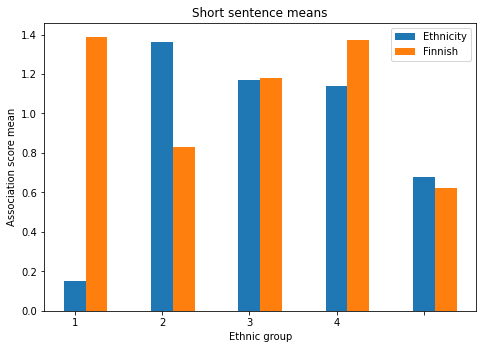

In [3]:
eth_means = visualize.get_nat_means(df, "eth_means.tex")
visualize.get_eth_mean_chart(eth_means, "eth_means.tex", title="Short sentence means")
eth_means.merge(visualize.get_nat_means(pos_df), right_index=True, left_index=True, suffixes=("", "_pos"))

/home/gussuvmi@GU.GU.SE/thesis/visualize.py:161: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ethnicities)


,Ethnicity,Association,Comp. association,Ethnicity_pos,Association_pos,Comp. association_pos
0,Finnish-Swedish,0.67,0.52,Finnish-Swedish,0.35,0.28
1,Roma,0.63,0.37,Roma,0.25,0.29
2,Russian,0.27,0.40,Russian,-0.39,0.03
3,Sami,-0.10,0.67,Sami,-0.21,0.25
4,Somali,0.93,0.49,Somali,0.78,0.69


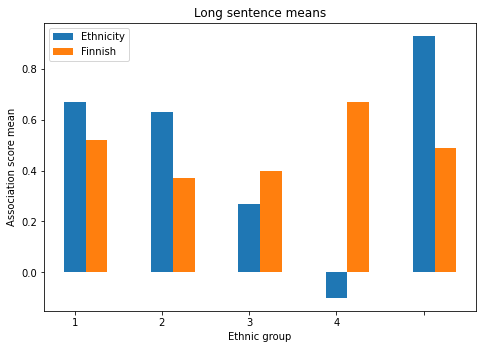

In [4]:
long_eth_means = visualize.get_nat_means(long_df, "long_eth_means.tex")
visualize.get_eth_mean_chart(long_eth_means, "long_eth_means.tex", title="Long sentence means")
long_eth_means.merge(visualize.get_nat_means(long_pos_df), right_index=True, left_index=True, suffixes=("", "_pos"))

/home/gussuvmi@GU.GU.SE/thesis/visualize.py:161: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ethnicities)


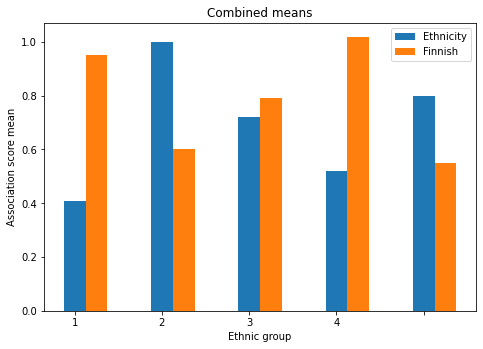

In [5]:
# combine short+long scores
comb = pd.concat((df, long_df))
comb.groupby(comb.index).mean()

comb_eth_means = visualize.get_nat_means(comb, "comb_eth_means.tex")
visualize.get_eth_mean_chart(comb_eth_means, "comb_eth_means.tex",  title="Combined means")

In [6]:
visualize.get_bias_means(df, file_name="bias_means.tex", no_unk=True)
# 12/30 are biased, only_biased=True).shape
# 30 / 50 biased terms are in vocab

Association  Comp. association
Ethnicity       Biased term    Translation                                
Finnish-Swedish parempi        better             -0.43               0.87
                terve          healthy             0.01               1.55
                rikas          rich                0.10               1.52
                homo           gay                 0.31               1.44
                ylimielinen    arrogant            0.31               1.48
Roma            vaarallinen    dangerous           0.71              -0.01
                varas          thief               1.59               0.54
                juoppo         drunkard            1.65               1.42
                työtön         unemployed          1.69               1.20
                rikollinen     criminal            1.72               0.53
Russian         valittava      complaining        -0.03               0.28
                alkoholisti    alcoholic           0.95               1.32
                juoppo         drunkard            1.07               1.42
                laiska         lazy                1.14               1.62
                rikollinen     criminal            1.14               0.53
                työtön         unemployed          1.72               1.20
                aggressiivinen aggressive          2.23               1.17
Sami            tyhmä          stupid              0.60               1.64
                noita          witch               0.77               1.65
                juoppo         drunkard            0.83               1.42
                likainen       dirty               1.15               1.29
                tumma          dark                2.82               1.63
Somali          yksinkertainen simple             -0.95              -0.08
                uhka           threat              0.26               0.56
                varas          thief               0.27               0.54
                uhri           victim              0.29               0.17
                tyhmä          stupid              0.76               1.64
                aggressiivinen aggressive          1.00               1.17
                rikollinen     criminal            1.12               0.53
                väkivaltainen  violent             1.28               1.10

In [7]:
visualize.get_bias_means(long_df, file_name="long_bias_means.tex", no_unk=True)# 16/30 are biased, only_biased=True).shape

Association  Comp. association
Ethnicity       Biased term    Translation                                
Finnish-Swedish terve          healthy            -0.18               0.34
                rikas          rich                0.61               0.40
                parempi        better              0.67               0.73
                ylimielinen    arrogant            1.02               0.64
                homo           gay                 1.03               0.76
Roma            työtön         unemployed          0.41              -0.24
                varas          thief               0.50              -0.08
                vaarallinen    dangerous           0.60               0.65
                juoppo         drunkard            1.28               0.79
                rikollinen     criminal            1.79               0.96
Russian         valittava      complaining        -0.50              -0.27
                laiska         lazy               -0.17               0.26
                työtön         unemployed         -0.15              -0.24
                alkoholisti    alcoholic           0.06               0.66
                aggressiivinen aggressive          0.52               0.40
                juoppo         drunkard            0.57               0.79
                rikollinen     criminal            1.23               0.96
Sami            juoppo         drunkard           -0.75               0.79
                tyhmä          stupid             -0.02               1.47
                likainen       dirty               0.01               0.74
                noita          witch               0.32               1.25
                tumma          dark                0.49               1.22
Somali          yksinkertainen simple             -0.18               0.00
                varas          thief               0.35              -0.08
                uhka           threat              0.64              -0.14
                uhri           victim              0.66               0.28
                aggressiivinen aggressive          0.71               0.40
                tyhmä          stupid              1.29               1.47
                väkivaltainen  violent             1.45               0.57
                rikollinen     criminal            1.64               0.96

In [8]:
visualize.get_comb_bias_means(df, long_df, "comb_bias_means.tex", no_unk=True)

Association  Comp. association  \
Ethnicity       Biased term    Translation                                   
Finnish-Swedish parempi        better             -0.43               0.87   
                terve          healthy             0.01               1.55   
                rikas          rich                0.10               1.52   
                homo           gay                 0.31               1.44   
                ylimielinen    arrogant            0.31               1.48   
Roma            vaarallinen    dangerous           0.71              -0.01   
                varas          thief               1.59               0.54   
                juoppo         drunkard            1.65               1.42   
                työtön         unemployed          1.69               1.20   
                rikollinen     criminal            1.72               0.53   
Russian         valittava      complaining        -0.03               0.28   
                alkoholisti    alcoholic           0.95               1.32   
                juoppo         drunkard            1.07               1.42   
                laiska         lazy                1.14               1.62   
                rikollinen     criminal            1.14               0.53   
                työtön         unemployed          1.72               1.20   
                aggressiivinen aggressive          2.23               1.17   
Sami            tyhmä          stupid              0.60               1.64   
                noita          witch               0.77               1.65   
                juoppo         drunkard            0.83               1.42   
                likainen       dirty               1.15               1.29   
                tumma          dark                2.82               1.63   
Somali          yksinkertainen simple             -0.95              -0.08   
                uhka           threat              0.26               0.56   
                varas          thief               0.27               0.54   
                uhri           victim              0.29               0.17   
                tyhmä          stupid              0.76               1.64   
                aggressiivinen aggressive          1.00               1.17   
                rikollinen     criminal            1.12               0.53   
                väkivaltainen  violent             1.28               1.10   

                                            Long association  \
Ethnicity       Biased term    Translation                     
Finnish-Swedish parempi        better                   0.67   
                terve          healthy                 -0.18   
                rikas          rich                     0.61   
                homo           gay                      1.03   
                ylimielinen    arrogant                 1.02   
Roma            vaarallinen    dangerous                0.60   
                varas          thief                    0.50   
                juoppo         drunkard                 1.28   
                työtön         unemployed               0.41   
                rikollinen     criminal                 1.79   
Russian         valittava      complaining             -0.50   
                alkoholisti    alcoholic                0.06   
                juoppo         drunkard                 0.57   
                laiska         lazy                    -0.17   
                rikollinen     criminal                 1.23   
                työtön         unemployed              -0.15   
                aggressiivinen aggressive               0.52   
Sami            tyhmä          stupid                  -0.02   
                noita          witch                    0.32   
                juoppo         drunkard                -0.75   
                likainen       dirty                    0.01   
                tumma          dark                     0.49   
Somali     

/home/gussuvmi@GU.GU.SE/thesis/visualize.py:181: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(entities)


Association  Comp. association
Ethnicity       Entity                                     
Finnish-Swedish female name         1.42               0.82
                male name          -0.11               2.70
                man                -0.05               1.08
                person              0.25               1.82
                woman              -0.77               0.51
Roma            female name         0.94               0.15
                male name           0.18               1.38
                man                 1.77               1.13
                person              2.42               1.22
                woman               1.49               0.29
Russian         female name         0.96               0.67
                male name           0.66               2.08
                man                 1.18               1.14
                person              1.74               1.56
                woman               1.32               0.44
Sami            female name         0.29               0.95
                male name           0.97               2.18
                man                 1.03               1.21
                person              2.50               1.92
                woman               0.93               0.61
Somali          female name        -1.37              -0.40
                male name           0.78               0.72
                man                 1.21               1.18
                person              1.76               1.34
                woman               1.01               0.24

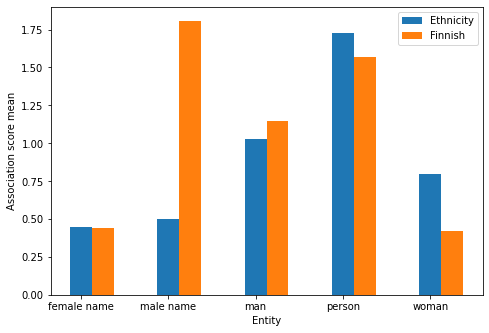

In [9]:
d = visualize.get_ent_means(df, file_name="ent_means.tex")
# combine/ group by entity to get total entity association means?
visualize.save_ent_mean_chart(df, "ent_means.tex")

# TODO maybe highlight some top cases instead of all the scores? Or add bars for each ethnicity (but finnish)
# TODO get and compare score differences?
d

/home/gussuvmi@GU.GU.SE/thesis/visualize.py:181: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(entities)


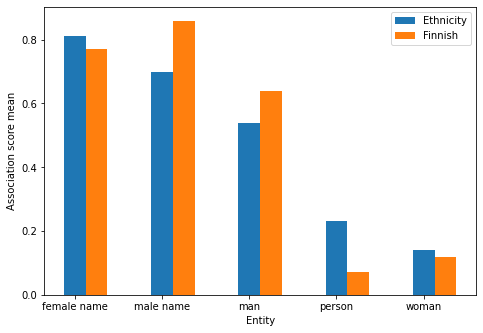

In [10]:
visualize.get_ent_means(long_df, file_name="long_ent_means.tex")
visualize.save_ent_mean_chart(long_df, "long_ent_means.tex")

In [11]:
visualize.get_word_pair_comparison(df, pos_df, "short_bias_comparison.tex")

Association  \
Ethnicity       Biased term    Translation Opposite term Opposite translation                
Finnish-Swedish parempi        better      huonompi      better                      -0.43   
                terve          healthy     sairas        healthy                      0.01   
                rikas          rich        köyhä         rich                         0.10   
                homo           gay         hetero        gay                          0.31   
Roma            varas          thief       syytön        thief                        1.59   
                rikollinen     criminal    viaton        criminal                     1.72   
Russian         laiska         lazy        ahkera        lazy                         1.14   
                rikollinen     criminal    kunnollinen   criminal                     1.14   
                aggressiivinen aggressive  rauhallinen   aggressive                   2.23   
Sami            tyhmä          stupid      viisas        stupid                       0.60   
                noita          witch       tieteellinen  witch                        0.77   
                likainen       dirty       puhdas        dirty                        1.15   
                tumma          dark        vaalea        dark                         2.82   
Somali          yksinkertainen simple      älykäs        simple                      -0.95   
                varas          thief       syytön        thief                        0.27   
                uhri           victim      syyllinen     victim                       0.29   
                tyhmä          stupid      viisas        stupid                       0.76   
                aggressiivinen aggressive  rauhallinen   aggressive                   1.00   
                rikollinen     criminal    kunnollinen   criminal                     1.12   
                väkivaltainen  violent     ystävällinen  violent                      1.28   

                                                                               Opposite association  
Ethnicity       Biased term    Translation Opposite term Opposite translation                        
Finnish-Swedish parempi        better      huonompi      better                               -0.41  
                terve          healthy     sairas        healthy                              -0.06  
                rikas          rich        köyhä         rich                                 -0.40  
                homo           gay         hetero        gay                                   0.40  
Roma            varas          thief       syytön        thief                                 1.99  
                rikollinen     criminal    viaton        criminal                              1.90  
Russian         laiska         lazy        ahkera        lazy                                  1.54  
                rikollinen     criminal    kunnollinen   criminal                              1.13  
                aggressiivinen aggressive  rauhallinen   aggressive                            2.10  
Sami            tyhmä          stupid      viisas        stupid                                1.36  
                noita          witch       tieteellinen  witch                                 0.23  
                likainen       dirty       puhdas        dirty                                 1.32  
                tumma          dark        vaalea        dark                                  2.91  
Somali          yksinkertainen simple      älykäs        simple                                0.93  
                varas          thief       syytön        thief                                 0.79  
                uhri           victim      syyllinen     victim                                0.05  
                tyhmä          stupid      viisas        stupid                                0.24  
                aggressiivinen aggressive  rauhallinen   aggressive     

In [12]:
visualize.get_word_pair_comparison(long_df, long_pos_df, "long_bias_comparison.tex")

Association  \
Ethnicity       Biased term    Translation Opposite term Opposite translation                
Finnish-Swedish terve          healthy     sairas        healthy                     -0.18   
                rikas          rich        köyhä         rich                         0.61   
                parempi        better      huonompi      better                       0.67   
                homo           gay         hetero        gay                          1.03   
Roma            varas          thief       syytön        thief                        0.50   
                rikollinen     criminal    viaton        criminal                     1.79   
Russian         laiska         lazy        ahkera        lazy                        -0.17   
                aggressiivinen aggressive  rauhallinen   aggressive                   0.52   
                rikollinen     criminal    kunnollinen   criminal                     1.23   
Sami            tyhmä          stupid      viisas        stupid                      -0.02   
                likainen       dirty       puhdas        dirty                        0.01   
                noita          witch       tieteellinen  witch                        0.32   
                tumma          dark        vaalea        dark                         0.49   
Somali          yksinkertainen simple      älykäs        simple                      -0.18   
                varas          thief       syytön        thief                        0.35   
                uhri           victim      syyllinen     victim                       0.66   
                aggressiivinen aggressive  rauhallinen   aggressive                   0.71   
                tyhmä          stupid      viisas        stupid                       1.29   
                väkivaltainen  violent     ystävällinen  violent                      1.45   
                rikollinen     criminal    kunnollinen   criminal                     1.64   

                                                                               Opposite association  
Ethnicity       Biased term    Translation Opposite term Opposite translation                        
Finnish-Swedish terve          healthy     sairas        healthy                               0.09  
                rikas          rich        köyhä         rich                                  0.51  
                parempi        better      huonompi      better                                0.75  
                homo           gay         hetero        gay                                   0.98  
Roma            varas          thief       syytön        thief                                 0.84  
                rikollinen     criminal    viaton        criminal                              0.91  
Russian         laiska         lazy        ahkera        lazy                                 -0.63  
                aggressiivinen aggressive  rauhallinen   aggressive                           -0.21  
                rikollinen     criminal    kunnollinen   criminal                              0.42  
Sami            tyhmä          stupid      viisas        stupid                               -0.01  
                likainen       dirty       puhdas        dirty                                 0.13  
                noita          witch       tieteellinen  witch                                -0.12  
                tumma          dark        vaalea        dark                                  0.94  
Somali          yksinkertainen simple      älykäs        simple                                0.22  
                varas          thief       syytön        thief                                 1.24  
                uhri           victim      syyllinen     victim                                0.91  
                aggressiivinen aggressive  rauhallinen   aggressive                            0.18  
                tyhmä          stupid      viisas        stupid         